# 데이터 불러오기

In [ ]:
df = pd.read_csv('data/텍스트유사도.csv')
ctr = pd.read_csv('data/의류/total_ctr.csv')

In [ ]:
df = df.set_index('content_id')
ctr= ctr.set_index('content_id')
ctr = ctr.loc[df.index]

df_img = df[df.bg_rgb != '-1']
ctr_img = ctr.loc[df_img.index]

# Image

### 배경색별 CTR 비교

- 세분화했던 색들을 다시 비슷한 색상군끼리 묶기

In [ ]:
# 색분류를 이용한 색 재분류

color_re_dict ={
    # Others
    "Others" : ['Orange', 'Gold', 'Yellow', 'Blueviolet', 'Purple', 'Magenta', 'Pink', 'Lime', 'Chartreuse', 'Green', 'Olive', 'Teal', 'Aqua', 'Skyblue', 'Navy', 'Blue'],
    # Brown
    "Brown" : ['Saddlebrown', 'Tan', "Red", "Maroon"],
    # Ivory
    "Ivory" : ['Wheat', 'Bisque', 'Blanchedalmond', 'Ivory', 'Linen'],
    # White
    "White" : ['White'],
    # Black
    "Black" : ['Black'],
    # Gray
    "Gray" : ['Gray', 'Silver']
    }
# key -> value
color_dict = {}
for key, values in color_re_dict.items():
    for val in values:
        color_dict[val] = key

In [ ]:
df_img['nobg_color_new'] = df_img.nobg_color.apply(lambda x: color_dict[x])

In [ ]:
df_img.nobg_color_new.value_counts()

Gray      17532
Black     10733
Brown      9841
Others     3378
Ivory       577
White         6
Name: nobg_color_new, dtype: int64

### 파이차트 찍어보기

In [ ]:
color_pie = df_img.groupby('bg_color_new').median()['ctr']

In [ ]:
color_pie_value = (color_pie.values)/color_pie.values.sum()

In [ ]:
color_pie_value

array([0.15200181, 0.165965  , 0.17059813, 0.1746032 , 0.16626424,
       0.17056762])

([<matplotlib.patches.Wedge at 0x7f27d689f8d0>,
 [Text(0.9769472141974591, 0.5055434112633891, 'Black'),
  Text(0.10362711482557513, 1.0951079495067724, 'Brown'),
  Text(-0.9029979154943183, 0.6281677838069348, 'Gray'),
  Text(-0.9773737094149269, -0.5047183691371916, 'Ivory'),
  Text(-0.025568479866807436, -1.099702802050309, 'Others'),
  Text(0.9458162182714995, -0.5616330485776272, 'White')])

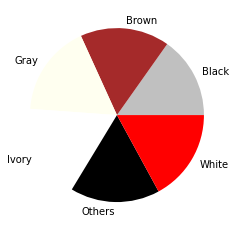

In [ ]:
colorr = ['silver', 'brown', 'ivory', 'white', 'black', 'red']
plt.pie(color_pie_value,
        labels = color_pie.index,
        colors=['silver', 'brown', 'ivory', 'white', 'black', 'red']
        )

### 바 그래프 그려보기

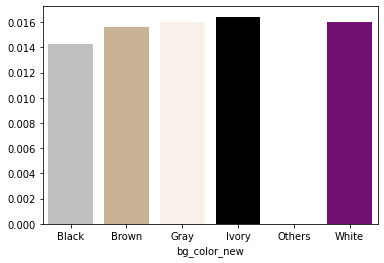

In [ ]:
colors = ["#FF73B8", "#FFFF36"]
colorr = ['#C0C0C0', '#D2B48C', '#FAF0E6', '#000000', '#FFFFFF', '#800080']
sns.set_palette(sns.color_palette(colorr))
sns.barplot(x = color_pie.index, y=color_pie.values)

### 배경색 별 CTR

In [ ]:
df_img.groupby('bg_color_new').mean()[['ctr', 'ctr_man', 'ctr_woman']]

,ctr,ctr_man,ctr_woman
bg_color_new,,,
Black,0.020818,0.022054,0.019583
Brown,0.022531,0.023820,0.021242
Gray,0.021941,0.022995,0.020888
Ivory,0.021602,0.023075,0.020128
Others,0.022181,0.023377,0.020985
White,0.021684,0.023298,0.020070


### 상품 색상별 CTR

In [ ]:
nobg_m2m = df_img.groupby('nobg_color').mean()[['ctr', 'ctr_man', 'ctr_woman']].sort_values('ctr', ascending=False)

In [ ]:
nobg_m2m = df_img.groupby('nobg_color').mean()[['ctr', 'ctr_man', 'ctr_woman']].sort_values('ctr', ascending=False)
nobg_m2m['cnt'] = df_img.nobg_color.value_counts()
nobg_m2m[nobg_m2m.cnt>10].sort_values('ctr', ascending=False)

,ctr,ctr_man,ctr_woman,cnt
nobg_color,,,,
Silver,0.028705,0.033036,0.024373,102
Saddlebrown,0.024841,0.028401,0.021282,100
Black,0.024272,0.027969,0.020574,245
Teal,0.023038,0.026690,0.019385,35
Tan,0.022829,0.026266,0.019391,23
Gray,0.022754,0.026179,0.019329,217
Navy,0.018580,0.021341,0.015819,36


In [ ]:
bg_m2m = df_img.groupby('bg_color').mean()[['ctr', 'ctr_man', 'ctr_woman']].sort_values('ctr', ascending=False)
bg_m2m['cnt'] = df_img.bg_color.value_counts()
bg_m2m[bg_m2m.cnt>10].sort_values('ctr', ascending=False)

,ctr,ctr_man,ctr_woman,cnt
bg_color,,,,
Saddlebrown,0.026865,0.030920,0.022810,50
Gray,0.025397,0.029144,0.021649,225
Linen,0.024864,0.028754,0.020974,41
Tan,0.024493,0.028193,0.020792,126
White,0.024398,0.028219,0.020577,67
Silver,0.024077,0.027704,0.020451,178
Wheat,0.023236,0.026515,0.019958,28
Black,0.020684,0.023865,0.017503,45


In [ ]:
nobg_m2m = df_img.groupby(['bg_color', 'nobg_color']).mean()[['ctr', 'ctr_man', 'ctr_woman']].sort_values('ctr', ascending=False)
# nobg_m2m['cnt'] = man2man.nobg_color.value_counts()
# nobg_m2m[nobg_m2m.cnt>10].sort_values('ctr', ascending=False)

In [ ]:
nobg_m2m.sort_values('ctr', ascending=False)

,,ctr,ctr_man,ctr_woman
bg_color,nobg_color,,,
Tan,Ivory,0.120883,0.135543,0.106223
Gray,Linen,0.082206,0.093777,0.070636
Navy,Black,0.074550,0.084741,0.064360
Linen,Teal,0.070414,0.081906,0.058921
Bisque,Saddlebrown,0.047091,0.054639,0.039543
...,...,...,...,...
Silver,Tan,0.007820,0.009278,0.006361
Ivory,Gray,0.004341,0.005068,0.003614
Navy,Navy,0.002257,0.002567,0.001948


## 배경과 상품간의 색상 차이 비교

- str으로 저장되어 있던 rgb 값을 np.array로 변환

In [ ]:
man2man.bg_rgb = man2man.bg_rgb.apply(lambda x: x.replace('[', '').replace(']', ''))
man2man.bg_rgb = man2man.bg_rgb.apply(lambda x: np.array([int(xx) for xx in x.split(' ') if xx!='']))

man2man.nobg_rgb = man2man.nobg_rgb.apply(lambda x: x.replace('[', '').replace(']', ''))
man2man.nobg_rgb = man2man.nobg_rgb.apply(lambda x: np.array([int(xx) for xx in x.split(' ') if xx!='']))

- 두 색상값(배경-상품) 간의 euclidean distance 계산

In [ ]:
man2man['content_bg_distance'] = (man2man.nobg_rgb - man2man.bg_rgb).apply(np.linalg.norm)

- 두 색상간 차이에 따른 CTR 비교

In [ ]:
man2man[man2man['content_bg_distance']>200].ctr.median()

0.020740171332311416

In [ ]:
man2man[man2man['content_bg_distance']<200].ctr.median()

0.01798462348524481

### 밝기별 CTR 비교

In [ ]:
man2man.bg_rgb = man2man.bg_rgb.apply(lambda x: x.replace('[', '').replace(']', ''))
man2man.bg_rgb = man2man.bg_rgb.apply(lambda x: np.array([int(xx) for xx in x.split(' ') if xx!='']))

man2man.nobg_rgb = man2man.nobg_rgb.apply(lambda x: x.replace('[', '').replace(']', ''))
man2man.nobg_rgb = man2man.nobg_rgb.apply(lambda x: np.array([int(xx) for xx in x.split(' ') if xx!='']))

# 밝기 계산(RGB) : White(0,0,0)과의 거리 계산
man2man['nobg_bright'] = man2man.nobg_rgb.apply(np.linalg.norm)
man2man['bg_bright'] = man2man.bg_rgb.apply(np.linalg.norm)
# 밝기 계산(HSV) : HSV에서 V(밝기) 계산
man2man['nobg_V'] = man2man.nobg_rgb.apply(max)
man2man['bg_V'] = man2man.bg_rgb.apply(max)

- 밝기별 CTR 비교

In [ ]:
print(f'어두운상품 : {man2man[man2man.bright < 145].ctr.mean()}')
print(f'밝은 상품 : {man2man[man2man.bright > 145].ctr.mean()}')

어두운상품 : 0.023305248263420928
밝은 상품 : 0.025556481928181673


In [ ]:
print('==============================')
print('RGB : white와의 거리')
print('------------ 배경 ------------')
print(f'어두운상품 : {round(man2man[man2man.bg_bright < 145].ctr.mean()*100,2)}%')
print(f'밝은 상품 : {round(man2man[man2man.bg_bright > 145].ctr.mean()*100,2)}%')
print('------------ 상품 ------------')
print(f'어두운상품 : {round(man2man[man2man.bright < 145].ctr.mean()*100,2)}%')
print(f'밝은 상품 : {round(man2man[man2man.bright > 145].ctr.mean()*100,2)}%')
print('==============================')
print('HSV : V 기준')
print('------------ 배경 ------------')
print(f'어두운상품 : {round(man2man[man2man.bg_V < 128].ctr.mean()*100,2)}%')
print(f'밝은 상품 : {round(man2man[man2man.bg_V > 128].ctr.mean()*100,2)}%')
print('------------ 상품 ------------')
print(f'어두운상품 : {round(man2man[man2man.V < 128].ctr.mean()*100,2)}%')
print(f'밝은 상품 : {round(man2man[man2man.V > 128].ctr.mean()*100,2)}%')
print('==============================')

RGB : white와의 거리
------------ 배경 ------------
어두운상품 : 2.41%
밝은 상품 : 2.45%
------------ 상품 ------------
어두운상품 : 2.33%
밝은 상품 : 2.56%
HSV : V 기준
------------ 배경 ------------
어두운상품 : 2.36%
밝은 상품 : 2.45%
------------ 상품 ------------
어두운상품 : 2.32%
밝은 상품 : 2.64%


### 배경 크기에 대한 비교

In [ ]:
classifier('background_ratio', 0.3, df_img, ctr_img)

(1.64, 1.45)

In [ ]:
classifier('background_ratio', 0.7, df_img, ctr_img)

(1.45, 1.49)

### 이미지내 사람 여부에 대해 비교

In [ ]:
df_img['human'] = df_img['human_ratio'].apply(lambda x: x>0.1)
df_img.groupby(['content_cat_2','human']).mean()[['ctr', 'ctr_man', 'ctr_woman']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


ctr   ctr_man  ctr_woman
content_cat_2 human                               
가디건           False  0.013420  0.013295   0.013545
              True   0.012744  0.012618   0.012870
가디건           False  0.022151  0.025328   0.018974
              True   0.024328  0.027783   0.020873
니트/스웨터        False  0.013086  0.014258   0.011914
              True   0.012429  0.012968   0.011889
맨투맨           False  0.022344  0.023901   0.020787
              True   0.022056  0.022738   0.021375
바지            False  0.023714  0.025914   0.021514
              True   0.022390  0.023752   0.021029
반바지           False  0.016000  0.017168   0.014832
              True   0.018276  0.019263   0.017290
블라우스          False  0.019684  0.019448   0.019920
              True   0.019713  0.019381   0.020044
셔츠            False  0.021150  0.022853   0.019448
              True   0.019030  0.019871   0.018189
언더웨어/홈웨어      False  0.026952  0.028609   0.025296
              True   0.025579  0.026527   0.024631
원피스           False  0.009339  0.009211   0.009468
              True   0.011069  0.010938   0.011199
자켓            False  0.022007  0.023824   0.020191
              True   0.020650  0.021338   0.019961
점프수트          False  0.019711  0.019411   0.020012
              True   0.019260  0.018872   0.019647
정장            False  0.020566  0.021649   0.019484
              True   0.021610  0.021496   0.021724
조끼/베스트        False  0.023025  0.024504   0.021545
              True   0.023243  0.024148   0.022338
청바지           False  0.020241  0.021815   0.018666
              True   0.019420  0.020217   0.018623
코트            False  0.029262  0.030687   0.027838
              True   0.028900  0.029573   0.028228
테마/이벤트        False  0.032171  0.034074   0.030269
              True   0.034453  0.035791   0.033116
트레이닝          False  0.019539  0.020565   0.018514
              True   0.020634  0.020862   0.020406
티셔츠           False  0.022018  0.024194   0.019841
              True   0.019049  0.020141   0.017958
패딩/점퍼         False  0.021712  0.022991   0.020433
              True   0.022705  0.023481   0.021930
후드티/후드집업      False  0.018984  0.020274   0.017694
              True   0.017127  0.017718   0.016536